In [6]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import datetime
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_sample = pd.read_csv('20171016-210106-DataSample.csv',dtype={"value": float})
data_sample2 = pd.read_csv('20171016-210304-DataSample.csv',dtype={"value": float})
data_sample3 = pd.read_csv('20171016-210529-DataSample.csv',dtype={"value": float})
data_sample4 = pd.read_csv('20171016-235959-DataSample.csv',dtype={"value": float})

data_sample = data_sample.append([data_sample2,data_sample3,data_sample4])
data_sample['startDate'] = pd.to_datetime(data_sample['startDate']) 
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['endDate'] = pd.to_datetime(data_sample['startDate'])


to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday 
data_sample['owner'].unique()

array(['00000000-56ff-538b-2223-e1800b5e3ddb',
       '00000000-5851-ee08-eb34-e20acc5af74e',
       'd145b032-b7a5-4fa8-9887-b46598f4683a',
       '00000000-5951-4787-2497-ae32dc8d07d4',
       '00000000-584e-1f39-bdee-d4102b989d01',
       '00000000-584d-a4f0-bdee-d4102b989ce5'], dtype=object)

# Do not run this cell. 

data_sample = pd.read_csv('20171016-210106-DataSample.csv',dtype={"value": str})
data_sample2 = pd.read_csv('20171016-210304-DataSample.csv',dtype={"value": str})
data_sample3 = pd.read_csv('20171016-210529-DataSample.csv',dtype={"value": str})
data_sample4 = pd.read_csv('20171016-235959-DataSample.csv',dtype={"value": str})


#data_sample2['value'] = pd.to_numeric(data_sample2['value'],errors='coerce')
#data_sample['value'] = pd.to_numeric(data_sample['value'],errors='coerce')
data_sample = data_sample.append(data_sample2)
#data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)


types = data_sample['type'].unique()
types

for t in types:
    f = lambda x: float(x.replace(',',''))
    # checks if the values contain decimal points, and uses a float conversion if so
    for v in data_sample.loc[data_sample['type'] == t, 'value'].head():
        if '.' in v:
            f = lambda x: float(x.replace(',',''))
            break
    data_sample.loc[data_sample['type'] == t, 'value'] = data_sample.loc[data_sample['type'] == t, 'value'].map(f)
for col in ['startDate', 'endDate', 'createdAt', 'updatedAt']:
    data_sample[col] = pd.to_datetime(data_sample[col], format='%Y-%m-%d %X')
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday 

# Sleep 

In [1]:
#Sleep -Lucas 
    #How long are they sleeping per day, what day highest/lowest 
    #Disturbances during night
    #Compared to national average
    #Correlate amount of sleep with avg steps

#Next Questions (Aydin as well)
    #Differences in activity (steps,HR) on days with more/less than average sleep duration
    #Differences in activity when number of disturbances is more/less than averages
    #Include also, same as above, but for a whole standard deviation above/below the average. 

### put code here

# Steps

In [4]:
#Steps - Matt
    #What day do you step the most? Least? 
    #What time of day do you step the most? 
    #What is the correlation between steps and sleep?
    #What is the correlation between avg steps and BMI/Weight/Heart Rate/Body Fat/ by months? 
    #On what days of the week is the user taking less steps than their average? Less than average of other users? 
     
#Next - Matt
    #Differences in other variables on days with more/extra sleep. Some questions to consider include
    #'do days with more steps on average look like they have more sleep?' 
    #Look at data split between days with above/average amount of sleep. Also look at data that was one 
    #standard deviation above/below average amount of steps. 
    


### code 

# Heart Rate

In [5]:
#Heart-Rate - John
    #Heart Rate over time. 
    #In the past 90 days, average heart rate rates
    #Heart rate max/min past 90 days 
    #Is your heart rate lower/higher than the national average? 
    
#Next Steps  
    #Differences in activity (steps,HR) on days with more/less HR
    #Include also, same as above, but for a whole standard deviation above/below the average. 

### code 

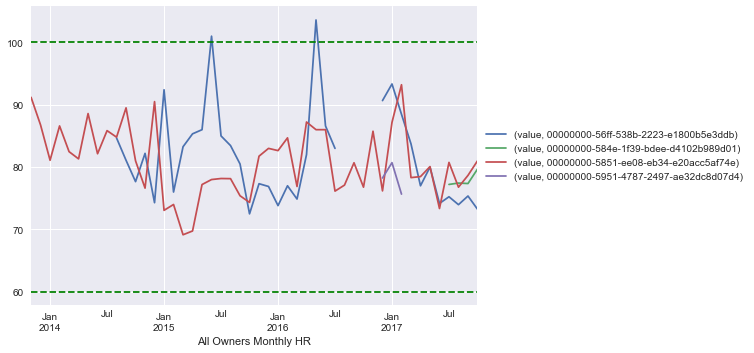

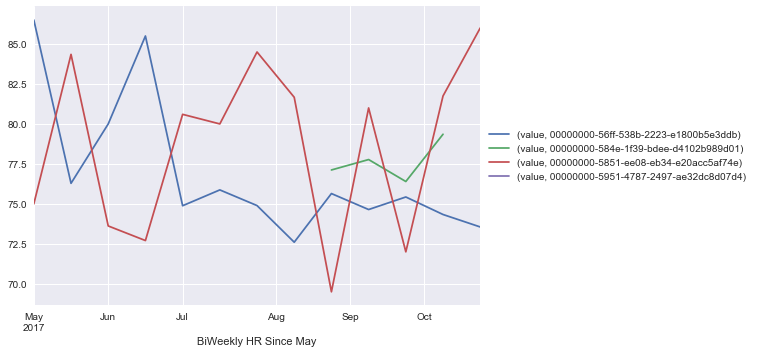

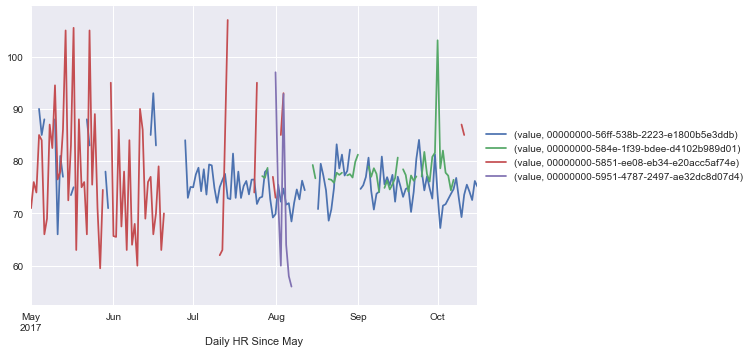

In [8]:
heartrate_df = data_sample[data_sample['type'] == 'health-heart-rate']  
heartrate_df.index = heartrate_df['startDate']
national_avg_lower = 60
national_avg_upper = 100

#Heart Rate Over Time for Users

heartrate_df['value'] = pd.Series(heartrate_df['value']).convert_objects(convert_numeric=True)
heartrate_df.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('M').mean().plot()   
plt.axhline(y=national_avg_lower, color='g', linestyle='--')
#plt.text(y=national_avg_lower,s='normal HR lower range',rotation=90,x=0)
plt.axhline(y=national_avg_upper, color='g', linestyle='--')
#plt.text(y=national_avg_upper,s='normal HR upper range',rotation=90,x=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('All Owners Monthly HR')


#Heart Rate Since May 
May = pd.Timestamp('20170501')
heartrate_df_jan = heartrate_df[heartrate_df['startDate'] > May]
heartrate_df_jan.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('2W').mean().plot()   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('BiWeekly HR Since May')

heartrate_df_jan = heartrate_df[heartrate_df['startDate'] > May]
heartrate_df_jan.loc[:,['owner','value','startDate']].groupby(['owner','startDate']).mean().unstack(level=0).resample('D').mean().plot()   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Daily HR Since May')

In [9]:
#Looking @ Statistics in the Past 90 Days 
drange = datetime.datetime.today() - pd.Timedelta(days=90)
heart_rate_90days = data_sample[(data_sample['type'] == 'health-heart-rate') & (data_sample['startDate'] > drange)]
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)
heart_rate_90days.reset_index()
stats = heart_rate_90days.groupby('owner',as_index=False).agg({
    'value':
    {'HR sum':'sum',
     'HR avg':'mean',
     'HR max':'max',
     'HR min':'min',
     'HR count':'count',
    'HR STD':'std'}})
stats

owner      value                           \
                                            HR sum     HR avg HR max HR min   
0  00000000-56ff-538b-2223-e1800b5e3ddb  2372428.0  74.628122  131.0   32.0   
1  00000000-584e-1f39-bdee-d4102b989d01   470782.0  77.699620  138.0   48.0   
2  00000000-5851-ee08-eb34-e20acc5af74e     3456.0  78.545455   95.0   55.0   
3  00000000-5951-4787-2497-ae32dc8d07d4     1788.0  74.500000  111.0   56.0   

                       
  HR count     HR STD  
0    31790  11.250750  
1     6059   8.242440  
2       44  10.339481  
3       24  19.509195

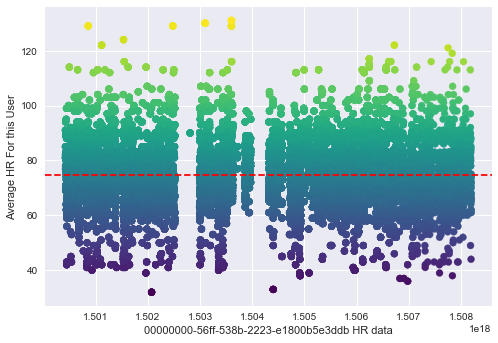

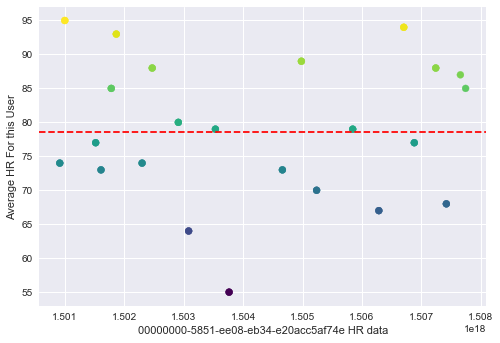

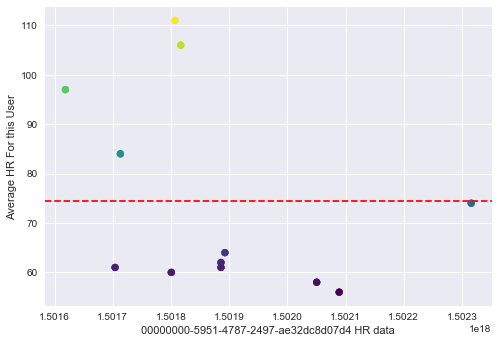

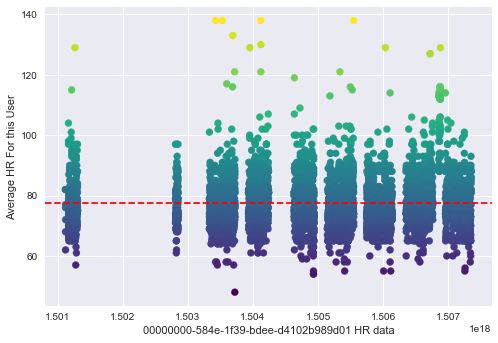

In [10]:
#Individual Plotting & Information  
heart_rate_90days = data_sample[(data_sample['type'] == 'health-heart-rate') & (data_sample['startDate'] > drange)]
heart_rate_90days.index = heart_rate_90days['startDate']
heart_rate_90days['value'] = pd.Series(heart_rate_90days['value']).convert_objects(convert_numeric=True)
heart_rate_90days['ts'] = heart_rate_90days['startDate'].dt.values.astype(np.int64) #// 10 ** 9


def HR_graph(owner): #punch in an owners id, will graph HR avg past 90 days
    muj = heart_rate_90days[heart_rate_90days['owner'] == owner]
    x = plt.scatter('ts', 'value', data=muj,c='value',cmap='viridis')
    if owner in stats['owner'].unique():
        plt.axhline(y=stats[stats['owner'] == owner]['value']['HR avg'].iloc[0],color='r',linestyle='--')
        plt.ylabel('Average HR For this User')
    plt.xlabel(owner + ' HR data')
    plt.show()
    return x


for i in heart_rate_90days['owner'].unique():
    HR_graph(i)

In [11]:
#On Days that HR is > AVG HR
HR = data_sample[data_sample['type'] == 'health-heart-rate']
def fifty(owner): #takes in owner, outputs two tables, one for when HR is above average, one for below 
    avg = stats[stats['owner'] == owner]['value']['HR avg'].iloc[0]
    above = HR[HR['value'] > avg]
    above = above[above['owner'] == owner]
    below = HR[HR['owner'] == owner]
    below = below[below['value'] < avg]
    return [above,below]

for i in stats['owner'].unique():
    print(np.mean(fifty(i)[0]['value']),np.mean(fifty(i)[1]['value']))
#next steps, will look into the specific behavior when below,above average.    
    

84.2316751815004 66.82763674183332
84.55123936366999 72.18116805721097
91.9090909090909 67.07256637168142
81.82699619771863 68.1311475409836


# BMI/Body Fat/Weight

In [2]:
#Bmi/Body Fat/Weight -Luqmaan/Sebastian 
    #How has BMI 
    #BMI average versus others 
    #BMI rate of change compared to other people's rates of change 
    #Weight over time/lowest weight/highest weight 
    #biggest weight change in a month span 
    #Weight change correlated with avg steps. Does avg steps imply more weight loss?
    
#Next Steps 
    #When average weight change is negative/positive, what does other data look like. Meaning if user X 
    #lost 2 pounds in one month, what other activity was different, if any? 
    #Table with numbers and graphs. Focus on steps/sleeps. 
    #Do the same for the above, but look at when average weight change was a SD above/below the average.
    #p.s. for rate of change you probably want to make another column that has the +/- from the last measurement.
    #for that user. 

### code 

In [ ]:

    #BMI average versus others 
    #BMI rate of change compared to other people's rates of change 
    #Weight over time/lowest weight/highest weight 
    #biggest weight change in a month span 
    #Weight change correlated with avg steps. Does avg steps imply more weight loss?
    
#Next Steps 